In [1]:
import pandas as pd
pd.set_option("display.max_columns", 40)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.impute import SimpleImputer     
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df_train = pd.read_csv('../project_data/train.csv', keep_default_na=False, na_values='')
df_test = pd.read_csv('../project_data/test.csv', keep_default_na=False, na_values='')

In [3]:
df_train.columns = df_train.columns.str.replace(' ','_').str.lower()
df_test.columns = df_test.columns.str.replace(' ','_').str.lower()

<br>

### Data Cleaning and EDA

In [4]:
df_train.shape, df_test.shape

((2051, 81), (878, 80))

In [5]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,...,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,...,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,...,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,...,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,...,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,...,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [6]:
df_train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [8]:
#columns with the following ratings: Ex, Gd, TA, Fa, Po, and maybe NA

column_list = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'heating_qc','kitchen_qual','fireplace_qu','garage_qual','pool_qc']

In [9]:
#function to add 0 to NA
def ex_gd_etc(df, column_list):
    for column in column_list:
        df[column] = df[column].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})

In [10]:
ex_gd_etc(df_train, column_list)
ex_gd_etc(df_test, column_list)

In [11]:
df_train['lot_shape'].map({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})
df_train['utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
df_train['land_slope'].map({'Gtl':2, 'Mod':1, 'Sev':0})
df_train['bsmt_exposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0})
df_train['bsmtfin_type_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_train['bsmtfin_type_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_train['electrical'].map({'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':2})
df_train['functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df_train['garage_finish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0})
df_train['paved_drive'].map({'Y':2, 'P':1, 'N':0})
df_train['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0});

In [12]:
df_test['lot_shape'].map({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})
df_test['utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
df_test['land_slope'].map({'Gtl':2, 'Mod':1, 'Sev':0})
df_test['bsmt_exposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0})
df_test['bsmtfin_type_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_test['bsmtfin_type_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_test['electrical'].map({'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':2})
df_test['functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df_test['garage_finish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0})
df_test['paved_drive'].map({'Y':2, 'P':1, 'N':0})
df_test['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0});

In [13]:
df_train.isnull().sum().sum();

In [14]:
df_train.isnull().sum().sort_values(ascending = False).loc[lambda x: x > 0]

lot_frontage      330
garage_yr_blt     114
mas_vnr_type       22
mas_vnr_area       22
bsmt_exposure       4
bsmtfin_type_2      2
bsmt_full_bath      2
bsmt_half_bath      2
garage_cond         1
bsmt_qual           1
garage_finish       1
garage_cars         1
garage_area         1
garage_qual         1
total_bsmt_sf       1
bsmtfin_type_1      1
bsmt_cond           1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
dtype: int64

In [15]:
df_train.shape

(2051, 81)

In [16]:
df_test.shape

(878, 80)

In [17]:
df_train = df_train.drop(columns=['lot_frontage','garage_yr_blt'])
df_train = df_train[df_train['gr_liv_area'] < 4000]
#for now, removing these columns due to amount of nulls
df_test = df_test.drop(columns=['lot_frontage','garage_yr_blt'])

In [18]:
df_train = df_train.dropna()
#removing rows with nulls because there are only 29 left with nulls

In [19]:
df_train.isnull().sum().sum()

0

[Text(0.5, 1.0, 'Sale Prices')]

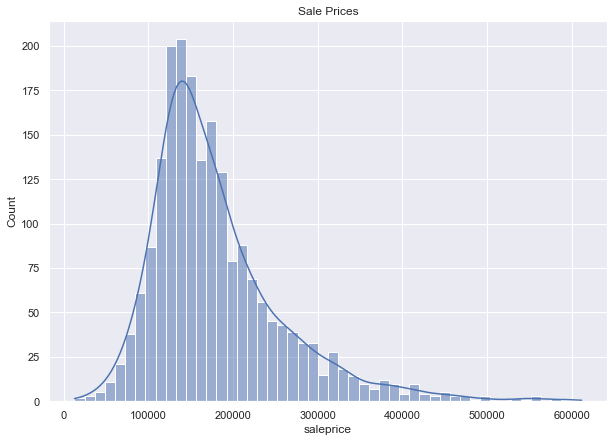

In [20]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.histplot(data=df_train, x='saleprice', kde=True, bins=50).set(title='Sale Prices')

In [21]:
df_train.shape

(2020, 79)

In [22]:
df_test.shape

(878, 78)

[Text(0.5, 1.0, 'Sale Prices')]

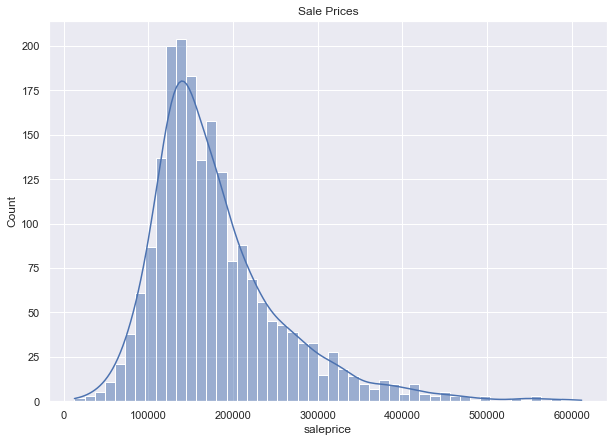

In [23]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.histplot(data=df_train, x='saleprice', kde=True, bins=50).set(title='Sale Prices')

In [24]:
df_train.corr().saleprice.sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.803514
gr_liv_area        0.722081
exter_qual         0.714685
kitchen_qual       0.692900
total_bsmt_sf      0.670084
1st_flr_sf         0.654955
garage_area        0.653647
garage_cars        0.647134
bsmt_qual          0.616083
year_built         0.572137
year_remod/add     0.549573
full_bath          0.538901
fireplace_qu       0.537753
mas_vnr_area       0.520235
totrms_abvgrd      0.511058
fireplaces         0.473982
heating_qc         0.458245
bsmtfin_sf_1       0.447272
open_porch_sf      0.331803
wood_deck_sf       0.330638
lot_area           0.303246
bsmt_full_bath     0.285711
garage_qual        0.285313
half_bath          0.279937
2nd_flr_sf         0.252081
bsmt_cond          0.224575
bsmt_unf_sf        0.189719
bedroom_abvgr      0.138619
screen_porch       0.138200
3ssn_porch         0.050002
exter_cond         0.038648
pool_qc            0.034742
pool_area          0.026527
mo_sold            0.025290
bsmtfin_sf_2       0

In [25]:
df_train['all_sf'] = df_train['total_bsmt_sf'] + df_train['gr_liv_area']
df_train['all_bath'] = df_train['bsmt_full_bath'] + .5 * df_train['bsmt_half_bath'] + df_train['full_bath'] + .5 * df_train['half_bath']

df_test['all_sf'] = df_test['total_bsmt_sf'] + df_test['gr_liv_area']
df_test['all_bath'] = df_test['bsmt_full_bath'] + .5 * df_test['bsmt_half_bath'] + df_test['full_bath'] + .5 * df_test['half_bath']

In [26]:
df_train.corr().saleprice.sort_values(ascending=False)

saleprice          1.000000
all_sf             0.827179
overall_qual       0.803514
gr_liv_area        0.722081
exter_qual         0.714685
kitchen_qual       0.692900
total_bsmt_sf      0.670084
1st_flr_sf         0.654955
garage_area        0.653647
garage_cars        0.647134
all_bath           0.631965
bsmt_qual          0.616083
year_built         0.572137
year_remod/add     0.549573
full_bath          0.538901
fireplace_qu       0.537753
mas_vnr_area       0.520235
totrms_abvgrd      0.511058
fireplaces         0.473982
heating_qc         0.458245
bsmtfin_sf_1       0.447272
open_porch_sf      0.331803
wood_deck_sf       0.330638
lot_area           0.303246
bsmt_full_bath     0.285711
garage_qual        0.285313
half_bath          0.279937
2nd_flr_sf         0.252081
bsmt_cond          0.224575
bsmt_unf_sf        0.189719
bedroom_abvgr      0.138619
screen_porch       0.138200
3ssn_porch         0.050002
exter_cond         0.038648
pool_qc            0.034742
pool_area          0

[Text(0.5, 1.0, 'Sale Price by Overall Quality')]

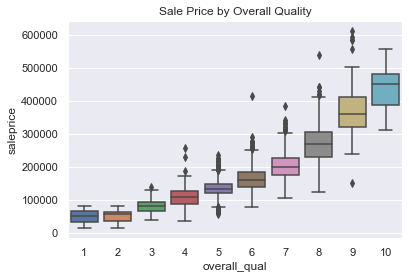

In [27]:
#1

sns.boxplot(data=df_train, x="overall_qual", y='saleprice').set(title='Sale Price by Overall Quality')

[Text(0.5, 1.0, 'Sale Price by Ground Living Area')]

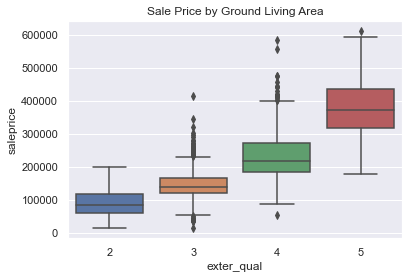

In [28]:
#2

sns.boxplot(data=df_train, x="exter_qual", y='saleprice').set(title='Sale Price by Ground Living Area')

[Text(0.5, 1.0, 'Sale Price by Ground Living Area')]

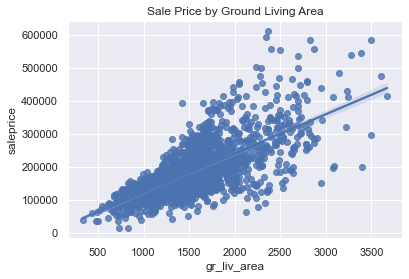

In [29]:
#3

sns.regplot(data=df_train, x="gr_liv_area", y='saleprice').set(title='Sale Price by Ground Living Area')

[Text(0.5, 1.0, 'Sale Price by Year Remodeled')]

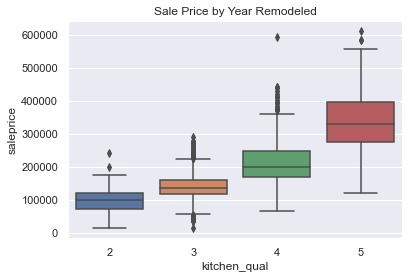

In [30]:
#4

sns.boxplot(data=df_train, x="kitchen_qual", y='saleprice').set(title='Sale Price by Year Remodeled')

[Text(0.5, 1.0, 'Sale Price by Total Basement Square Footage')]

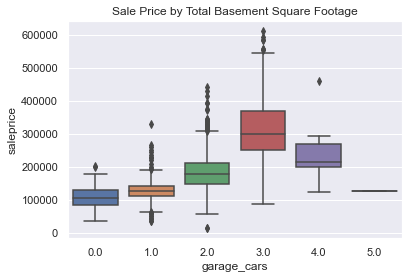

In [31]:
#5

sns.boxplot(data=df_train, x="garage_cars", y='saleprice').set(title='Sale Price by Total Basement Square Footage')

[Text(0.5, 1.0, 'Sale Price by Lot Area')]

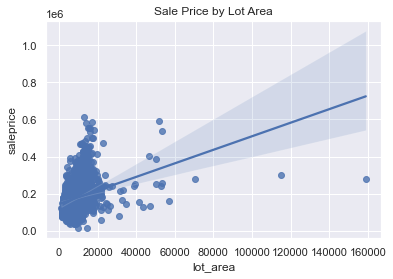

In [32]:
sns.regplot(data=df_train, x="lot_area", y='saleprice').set(title='Sale Price by Lot Area')

In [33]:
std_lot_area = df_train['lot_area'].std()
mean_lot_area = df_train['lot_area'].mean()
std_lot_area, mean_lot_area

(6576.963804908319, 9995.35594059406)

In [34]:
df_train = df_train[df_train['lot_area'] < mean_lot_area + (3*std_lot_area)]

[Text(0.5, 1.0, 'Sale Price by Masonry Veneer Area')]

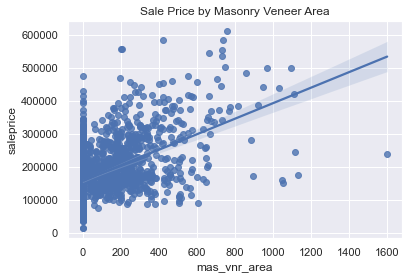

In [35]:
sns.regplot(data=df_train, x="mas_vnr_area", y='saleprice').set(title='Sale Price by Masonry Veneer Area')

In [36]:
std_mva = df_train['mas_vnr_area'].std()
mean_mva = df_train['mas_vnr_area'].mean()
std_mva, mean_mva

(171.03907336261764, 97.911955977989)

In [37]:
df_train = df_train[df_train['mas_vnr_area'] < mean_mva + (3*std_mva)]

In [38]:
df_train.shape

(1956, 81)

In [39]:
df_test.shape

(878, 80)

<br>

### Preprocessing and Modelling

----

In [40]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [41]:
X = df_train.drop(columns = ['id', 'pid', 'saleprice'])
y = df_train['saleprice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

In [42]:
numeric = [col for col in df_train._get_numeric_data().columns if col not in ['id', 'pid', 'saleprice']]


In [43]:
categorical = [col for col in df_train.columns if col not in numeric and col not in ['id', 'pid', 'saleprice']]


In [44]:
df_train['saleprice'] = np.log(df_train['saleprice'])

In [45]:
ctx = ColumnTransformer(
    [('ss', StandardScaler(), numeric),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [46]:
lasso_pipe = Pipeline([
    ('ct', ctx),
    ('model', LassoCV())
])

lasso_pipe_params = {
    'ct__remainder' : ['passthrough'],
    'ct__ss__with_mean' : [True, False],
}

In [47]:
gs_lasso = GridSearchCV(
    lasso_pipe,
    lasso_pipe_params,
    cv = 5,
    verbose = 2,
    error_score = 'raise'
)

In [48]:
gs_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ..ct__remainder=passthrough, ct__ss__with_mean=True; total time=   0.3s
[CV] END ..ct__remainder=passthrough, ct__ss__with_mean=True; total time=   0.6s
[CV] END ..ct__remainder=passthrough, ct__ss__with_mean=True; total time=   0.7s
[CV] END ..ct__remainder=passthrough, ct__ss__with_mean=True; total time=   0.5s
[CV] END ..ct__remainder=passthrough, ct__ss__with_mean=True; total time=   0.6s
[CV] END .ct__remainder=passthrough, ct__ss__with_mean=False; total time=   0.6s
[CV] END .ct__remainder=passthrough, ct__ss__with_mean=False; total time=   0.5s
[CV] END .ct__remainder=passthrough, ct__ss__with_mean=False; total time=   0.7s
[CV] END .ct__remainder=passthrough, ct__ss__with_mean=False; total time=   0.7s
[CV] END .ct__remainder=passthrough, ct__ss__with_mean=False; total time=   0.7s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('ss',
                                                                         StandardScaler(),
                                                                         ['ms_subclass',
                                                                          'lot_area',
                                                                          'overall_qual',
                                                                          'overall_cond',
                                                                          'year_built',
                                                                          'year_remod/add',
                                                                          'mas_vnr_area',
                                                                          'exter_qual',
                               

In [49]:
gs_lasso.best_score_

0.9072311471284795

In [50]:
gs_lasso.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['ms_subclass', 'lot_area',
                                                   'overall_qual',
                                                   'overall_cond', 'year_built',
                                                   'year_remod/add',
                                                   'mas_vnr_area', 'exter_qual',
                                                   'exter_cond', 'bsmt_qual',
                                                   'bsmt_cond', 'bsmtfin_sf_1',
                                                   'bsmtfin_sf_2',
                                                   'bsmt_unf_sf',
                                                   'total_bsmt_sf',
                                                   'heating_qc', '1st_flr_sf',
                             

In [51]:
gs_lasso.score(X_val, y_val)

0.9259046640245007

In [52]:
gs_lasso.best_params_

{'ct__remainder': 'passthrough', 'ct__ss__with_mean': True}

In [53]:
test_id = df_test['id']

In [54]:
df_train['saleprice'] = np.exp(df_train['saleprice'])

In [55]:
preds = gs_lasso.predict(df_test)

In [56]:
gs_lasso.best_params_

{'ct__remainder': 'passthrough', 'ct__ss__with_mean': True}

In [57]:
preds = gs_lasso.predict(df_test)

In [58]:
preds = pd.DataFrame(preds, columns = ['saleprice'])

In [59]:
preds

,saleprice
0,136484.484713
1,153706.802208
2,223763.651667
3,109987.713269
4,175059.071530
...,...
873,188852.800387
874,226135.622338
875,122320.265911
876,107396.870632


In [60]:
preds.insert(loc = 0, column = 'Id', value = test_id)

In [61]:
preds.shape


(878, 2)